# Introduction

### Objective

After a disappointing end of season at Arsenal Football Club where the club finished out of European spot , there is a pressure to recruit players who can bring club back on track with complete backing of the board. 

For this we will use the data from [here](https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset?select=players_21.csv) to analyse the squad and give our list of target to the manager who can then proceed with decision to whom to recruit which can further improve the team.

## Arsenal Football Club

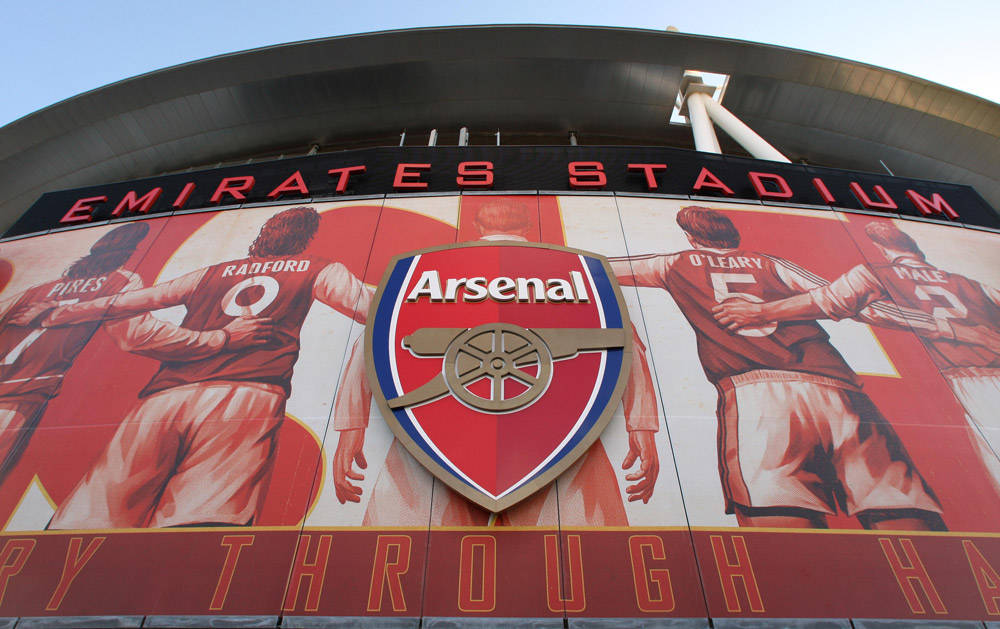

Arsenal Football Club is a professional football club based in Islington, London, England. Arsenal plays in the Premier League, the top flight of English football. The club has won 13 league titles , a record 14 FA Cups, two League Cups, 16 FA Community Shields, the League Centenary Trophy, one European Cup Winners' Cup, and one Inter-Cities Fairs Cup.

In [381]:
#Importing Necessary Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [382]:
#Read Player data
player=pd.read_csv('players_21.csv')

In [383]:
pd.set_option('display.max_columns', None)
player.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

In [384]:
#Shape of data
player.shape

(18944, 106)

We have 18944 players data and 106 attributes column for each player.

In [385]:
player.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 106 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    sofifa_id                   int64  
 1    player_url                  object 
 2    short_name                  object 
 3    long_name                   object 
 4    age                         int64  
 5    dob                         object 
 6    height_cm                   int64  
 7    weight_kg                   int64  
 8    nationality                 object 
 9    club_name                   object 
 10   league_name                 object 
 11   league_rank                 float64
 12   overall                     int64  
 13   potential                   int64  
 14   value_eur                   int64  
 15   wage_eur                    int64  
 16   player_positions            object 
 17   preferred_foot              object 
 18   international_reputation    int64  
 19   we

#### Checking Null Values

In [386]:
#Checking Null Values
null_value=player.isnull().sum()*100/len(player)
null_value[null_value.values>0]

club_name                 1.187711
league_name               1.187711
league_rank               1.187711
release_clause_eur        5.252323
player_tags              92.567568
team_position             1.187711
team_jersey_number        1.187711
loaned_from              95.998733
joined                    5.188978
contract_valid_until      1.187711
nation_position          94.050887
nation_jersey_number     94.050887
pace                     10.995566
shooting                 10.995566
passing                  10.995566
dribbling                10.995566
defending                10.995566
physic                   10.995566
gk_diving                89.004434
gk_handling              89.004434
gk_kicking               89.004434
gk_reflexes              89.004434
gk_speed                 89.004434
gk_positioning           89.004434
player_traits            56.107475
defending_marking       100.000000
dtype: float64

- The club_name , league_rank , league_rank null value is present as there are some players who are free agents so it will none only , so we can keep them as it is.<br>
- Not all players will have release clause so we can skip filling them also.<br>
- player_tags , team_position , joined , contract_valid_until , nation_position , national_jersey_number we can skip filling them as they even if they are considered for analysis filling them with random value can make that entry incorrect.<br>
- rest the traits like shooting , pace and gk_position we decide to skip filling also as with seeing the data we can say that the null values are for goalkeepers in case of shooting , pace , passing , dribbling, defending , physic as these datas are not relanvant while scouting a GK , same goes for gk_diving , gk_reflexes , gk_kicking , gk_speed , gk_positioning.

#### Dropping columns
- sofifa_id , player_url , long_name , dob , league_rank , body_type , real_face , team_jersey_number , nation_jersey_number is not required as it is not required for analysis.
- ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb we are removing as we dont want to know how the player rating get affected if the player is played in some other positions  

In [387]:
#Dropping the columns which are not relavant
player.drop(columns=['sofifa_id','player_url','long_name','dob','league_rank','body_type','real_face','team_jersey_number','nation_position','nation_jersey_number','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb'],inplace=True)

player.head(5)

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,loaned_from,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,NaN,2004-07-01,2021.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,NaN,2018-07-10,2022.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,159400000.0,NaN,GK,NaN,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,NaN,2014-07-01,2023.0,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,NaN,2017-08-03,2022.0,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11


In [388]:
# Data is now being made more structured so it is easy to understand
player["value_eur"]=player["value_eur"].apply(lambda x:x/1000000) # Converting in range of million Euro format
player["wage_eur"]=player["wage_eur"].apply(lambda x:x/1000) # Converting in range of thousands Euro format
player["release_clause_eur"]=player["release_clause_eur"].apply(lambda x:x/1000000) # Converting in range of million Euro format
player['joined']=player['joined'].apply(lambda x:str(x).split('-')[0] if x != None else x) # Getting only the year info when the player joined the club

### Now we will start with a rough analysis with the data and get to know data more.

In [389]:
#Getting to know the position the players play
player.team_position.value_counts()

SUB    8065
RES    3163
GK      681
LCB     681
RCB     681
RB      553
LB      553
ST      452
LCM     425
RCM     425
RM      420
LM      420
CAM     286
RDM     248
LDM     248
RS      224
LS      224
CDM     181
RW      170
LW      170
CB      128
LWB      78
RWB      78
CM       76
LAM      25
RAM      25
CF       13
LF       13
RF       13
Name: team_position, dtype: int64

We can see that this column cannot be used to sort player based on there position as there are huge number of players present in Substitute and Reserves due to which we will miss out the position of many players actually play.<br>
We will use the <b>player_positions</b> instead as this contains the info about the positions where the player can play and take only the only 1st value in assumption that is the players most prefered position. 

In [390]:
# Getting to know the position the players play
player.player_positions.value_counts()

CB             2437
GK             2083
ST             1893
CDM, CM         827
CM              810
               ... 
CDM, LM, CM       1
RM, RWB, ST       1
RB, LB, CM        1
CB, CAM           1
LW, LWB           1
Name: player_positions, Length: 611, dtype: int64

In [391]:
# Getting the prefered position the player want to play position
posn=[]
# Getting the 1st prefered position
for i in range (len(player['player_positions'])):
    posn.append(player['player_positions'][i].split(',')[0])
# Creating a new column
player["prefered_posn"]=posn

In [392]:
# Checking the value
player.prefered_posn.value_counts()

CB     3252
ST     2645
CM     2241
GK     2084
CDM    1514
LB     1402
RB     1363
CAM    1148
LM     1069
RM     1065
RW      438
LW      420
CF      115
LWB     100
RWB      88
Name: prefered_posn, dtype: int64

This looks good for analysis.<br>
Now we will create a new column <b>category</b> to distribute the group of players in 4 categories based on position "GK" , "DEF" , "MID" , "ATT" . This will help while doing analysis.

In [393]:
#Creating category column
category=[]
#distributing the players based on position
for x in player['prefered_posn']:
    if x=='CB' or x=='RB' or x=='LB' or x=='LWB' or x=='RWB':
        category.append('DEF')
    elif x=='CM' or x=='CDM' or x=='CAM' or x=='RM' or x=='LM' :
        category.append('MID')
    elif x=='ST' or x=='CF' or x=='RW' or x=='LW' :
        category.append('ATT')
    else:
        category.append('GK')

#Appending the column in dataset
player['Category']=category

In [394]:
player.Category.value_counts()

MID    7037
DEF    6205
ATT    3618
GK     2084
Name: Category, dtype: int64

Now finally a new column is created reference_potential to see how much the potential is increasing for the player , higher the difference more future sale value we can get once the player is sold.

In [395]:
player['reference_potential']=player['potential']-player['overall']

In [396]:
player.head(2)

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,loaned_from,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,prefered_posn,Category,reference_potential
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,93,93,67.5,560.0,"RW, ST, CF",Left,5,4,4,Medium/Low,138.4,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,NaN,2004,2021.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,RW,ATT,0
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,92,92,46.0,220.0,"ST, LW",Right,5,4,5,High/Low,75.9,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,NaN,2018,2022.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,ST,ATT,0


## Analysis for Arsenal Football Team

In [397]:
#Creating dataset containing arsenal players
arsenal=player[player['club_name']=='Arsenal']
arsenal.reset_index(drop=True,inplace=True)
arsenal

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,loaned_from,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,prefered_posn,Category,reference_potential
0,P. Aubameyang,31,187,80,Gabon,Arsenal,English Premier League,87,87,45.000,170.0,"ST, LW",Right,3,4,4,High/High,85.500,#Speedster,LW,NaN,2018,2021.0,93.0,86.0,75.0,80.0,38.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Speed Dribbler (AI...",76,91,75,77,84,80,81,76,64,82,91,94,77,88,68,82,75,80,74,78,43,48,93,77,78,88,NaN,29,36,6,9,15,9,9,ST,ATT,0
1,B. Leno,28,190,82,Germany,Arsenal,English Premier League,85,87,33.500,105.0,GK,Right,3,3,1,Medium/Medium,66.200,NaN,GK,NaN,2018,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,83.0,80.0,86.0,56.0,84.0,Rushes Out Of Goal,9,9,13,50,10,16,9,8,48,35,55,56,52,81,44,60,73,43,70,14,28,25,7,56,23,66,NaN,15,18,85,83,80,84,86,GK,GK,2
2,A. Lacazette,29,176,77,France,Arsenal,English Premier League,83,83,26.000,125.0,ST,Right,3,4,4,High/High,49.400,NaN,ST,NaN,2017,2022.0,76.0,82.0,75.0,84.0,46.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Outside Foot Shot, Technical Dribbler (AI)",68,83,75,79,79,84,74,74,70,85,77,75,81,84,82,87,76,77,75,78,74,42,84,78,76,81,NaN,51,32,11,6,9,5,6,ST,ATT,0
3,N. Pépé,25,183,73,Ivory Coast,Arsenal,English Premier League,82,85,28.000,98.0,"RM, RW",Left,1,2,4,High/Medium,55.300,#Acrobat,RW,NaN,2019,2024.0,89.0,78.0,75.0,84.0,33.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Flair, Long Shot Taker (AI), Spe...",78,77,57,74,70,85,79,79,67,81,88,90,89,83,79,80,68,79,68,77,43,28,80,80,85,77,NaN,27,25,11,14,11,6,8,RM,MID,3
4,M. Özil,31,180,71,Germany,Arsenal,English Premier League,82,82,19.500,100.0,"CAM, RW",Left,4,2,4,Medium/Low,37.100,#Playmaker,RES,NaN,2013,2021.0,64.0,69.0,85.0,83.0,24.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Flair, Playmaker (AI), Outside F...",81,68,51,88,78,82,84,75,82,88,67,61,75,81,71,70,45,62,56,67,44,24,80,90,67,83,NaN,16,19,6,14,10,6,14,CAM,MID,0
5,Willian,31,175,77,Brazil,Arsenal,English Premier League,82,82,19.500,110.0,"RW, LW, RM",Right,3,4,4,High/High,37.100,"#Dribbler, #Acrobat",SUB,NaN,2020,2023.0,82.0,79.0,80.0,85.0,49.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Flair, Technical Dribbler (AI)",76,77,31,80,59,88,83,84,77,82,86,78,86,80,79,84,32,77,59,81,45,55,79,83,79,79,NaN,57,51,14,12,13,7,13,RW,ATT,0
6,L. Torreira,24,168,65,Uruguay,Arsenal,English Premier League,81,85,21.000,74.0,"CDM, CM",Right,2,3,3,Medium/High,41.500,NaN,SUB,NaN,2018,2023.0,74.0,67.0,75.0,79.0,79.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,61,59,80,65,77,70,72,75,79,76,72,85,78,90,78,52,83,67,74,86,83,68,74,48,78,NaN,83,77,5,5,13,7,9,CDM,MID,4
7,Héctor Bellerín,25,178,74,Spain,Arsenal,English Premier League,80,85,17.500,76.0,"RB, RWB",Right,3,2,3,High/Low,34.600,NaN,RWB,NaN,2014,2023.0,85.0,51.0,70.0,77.0,76.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,Speed Dribbler (AI),75,52,60,77,41,77,63,50,59,77,84,86,78,79,77,52,64,75,58,43,72,78,67,66,62,70,NaN,78,79,8,14,14,13,12,RB,DEF,5
8,Dani Ceballos,23,179,68,Spain,Arsenal,English Premier League,80,85,19.500,76.0,"CM, CAM",Right,2,3,4,H

In [398]:
#This will be our player dataset to lookup to get players
club=['Arsenal','Chelsea','Tottenham Hotspur']
player_list=player[~player['club_name'].isin(club)]
#player_list=player[player['club_name']!='Arsenal']
player_list.reset_index(drop=True,inplace=True)

In [399]:
# Player distribution based on country
fig = px.bar(arsenal.groupby(by=['nationality']).count()['club_name'],
             x=arsenal.groupby(by=['nationality']).count()['club_name'].index,
             y=arsenal.groupby(by=['nationality']).count()['club_name'].values,
             labels={"x": "Nationality",  "y": "No. of Players"},
             title='Player distribution based on Nationality')
fig.show()

- Maximum Number of players are from England with 10 followed by Brazil and Spain.

In [400]:
# Player distribution based on category
fig = px.bar(arsenal.groupby(by=['Category']).count()['club_name'],
             x=arsenal.groupby(by=['Category']).count()['club_name'].index,
             y=arsenal.groupby(by=['Category']).count()['club_name'].values,
             labels={"x": "Categories",  "y": "No. of Players"},
             title='Player distribution based on categories')
fig.show()

- We have huge number of defenders followed by midfielder and attacker.

In [401]:
fig = go.Figure(data=[go.Pie(labels=arsenal.preferred_foot.value_counts().index, 
                             values=arsenal.preferred_foot.value_counts(),
                             title='Prefered Foot',
                             hole=0.4)])
fig.show()

- Majority of player are Right Footed.

In [402]:
arsenal.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,reference_potential
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,32.000000,33.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,0.0,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,24.727273,182.909091,77.090909,76.212121,82.000000,12.645455,62.000000,1.787879,2.969697,2.878788,25.066406,2022.515152,72.700000,61.433333,67.866667,72.333333,59.900000,70.000000,70.666667,69.000000,67.666667,72.000000,46.333333,69.333333,59.151515,54.666667,57.272727,70.424242,49.818182,66.212121,58.393939,50.787879,63.000000,70.151515,70.212121,70.363636,68.151515,73.393939,66.393939,68.727273,62.424242,70.303030,69.272727,55.848485,64.666667,56.606061,60.030303,65.272727,54.181818,70.848485,NaN,56.393939,54.696970,15.454545,16.000000,16.272727,14.727273,15.878788,5.787879
std,4.295875,6.816174,7.592610,6.127589,4.683748,9.829167,35.770099,1.023400,0.683961,0.927280,18.939313,1.202113,11.850069,12.952655,9.828647,9.018500,19.957455,9.262457,12.423097,12.489996,11.239810,12.165525,8.736895,12.858201,19.287498,19.425606,19.906457,13.939670,18.517651,19.510826,20.624529,20.394174,15.467708,16.215581,14.192334,13.810816,14.405123,7.570252,14.106602,12.281268,15.169934,12.563551,10.630948,19.819689,20.551257,23.212253,20.843891,14.091825,16.135083,8.807388,NaN,25.564794,24.547766,18.224453,17.564168,17.006015,18.005681,18.501280,5.412703
min,18.000000,168.000000,64.000000,60.000000,67.000000,0.250000,4.000000,1.000000,2.000000,1.000000,0.525000,2021.000000,52.000000,33.000000,42.000000,49.000000,20.000000,47.000000,63.000000,59.000000,58.000000,64.000000,39.000000,60.000000,9.000000,9.000000,11.000000,27.000000,10.000000,13.000000,9.000000,8.000000,22.000000,19.000000,38.000000,40.000000,37.000000,52.000000,33.000000,44.000000,31.000000,33.000000,44.000000,12.000000,18.000000,15.000000,7.000000,33.000000,22.000000,44.000000,NaN,11.000000,12.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000
25%,21.000000,178.000000,71.000000,74.000000,80.000000,7.000000,38.000000,1.000000,3.000000,2.000000,13.125000,2022.000000,64.500000,57.500000,62.250000,68.250000,44.500000,65.250000,63.500000,62.000000,61.500000,65.000000,41.500000,62.000000,47.000000,50.000000,45.000000,69.000000,39.000000,62.000000,54.000000,36.000000,58.000000,70.000000,59.000000,61.000000,58.000000,71.000000,59.000000,60.000000,51.000000,67.000000,61.000000,48.000000,45.000000,37.000000,49.000000,58.000000,47.000000,67.000000,NaN,30.000000,32.000000,7.000000,8.000000,10.000000,7.000000,9.000000,1.000000
50%,25.000000,182.000000,77.000000,77.000000,83.000000,10.000000,59.000000,1.000000,3.000000,3.000000,20.700000,2022.000000,74.000000,63.500000,70.000

- Over 50% squad age is less then 25 which means we have a good mixture of youth and experience player with mean age of 24 years.
- Overall rating of team is 76 which is pretty average which we need to improve.

In [403]:
# Now we will check how the mean age and overall value is showing variation category wise.
arsenal_att=arsenal[arsenal['Category']=='ATT']
arsenal_mid=arsenal[arsenal['Category']=='MID']
arsenal_def=arsenal[arsenal['Category']=='DEF']

In [404]:
arsenal_att.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,reference_potential
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,0.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,24.142857,178.857143,74.285714,75.571429,83.142857,15.675000,74.428571,1.857143,3.571429,3.571429,30.385714,2022.000000,82.714286,72.571429,64.857143,76.571429,36.285714,63.571429,NaN,NaN,NaN,NaN,NaN,NaN,61.571429,75.571429,56.857143,69.00000,65.142857,76.714286,67.285714,60.714286,56.000000,75.857143,83.714286,81.857143,80.142857,74.714286,74.285714,73.857143,56.285714,73.000000,63.428571,66.571429,54.285714,37.285714,76.714286,67.571429,65.142857,72.714286,NaN,35.428571,32.857143,10.714286,9.571429,11.142857,8.571429,9.142857,7.571429
std,5.899960,4.220133,4.070802,9.180725,2.267787,15.786235,60.626884,1.069045,0.534522,0.534522,29.599180,0.816497,6.369571,9.947481,13.446543,8.363754,11.294752,7.276839,NaN,NaN,NaN,NaN,NaN,NaN,15.479633,9.413769,17.247498,11.47461,12.307566,9.569296,14.465065,19.180844,15.684387,8.745067,5.677860,7.244045,4.634241,10.209706,6.550173,10.318730,18.364044,5.773503,8.383658,12.081075,14.232759,14.020393,9.759001,13.189101,12.005951,10.703804,NaN,15.597619,13.309503,2.497618,2.699206,2.609506,2.819997,3.804759,7.785824
min,18.000000,175.000000,69.000000,60.000000,80.000000,0.425000,4.000000,1.000000,3.000000,3.000000,1.200000,2021.000000,74.000000,59.000000,42.000000,60.000000,20.000000,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,62.000000,31.000000,47.00000,51.000000,58.000000,43.000000,37.000000,33.000000,59.000000,75.000000,73.000000,72.000000,60.000000,64.000000,60.000000,32.000000,66.000000,52.000000,53.000000,42.000000,18.000000,63.000000,45.000000,52.000000,60.000000,NaN,15.000000,15.000000,6.000000,6.000000,7.000000,5.000000,5.000000,0.000000
25%,19.500000,175.500000,71.000000,71.500000,82.000000,4.650000,36.500000,1.000000,3.000000,3.000000,9.750000,2021.500000,79.000000,66.500000,58.000000,75.000000,28.500000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,54.000000,71.000000,46.000000,66.00000,57.000000,75.000000,60.000000,43.500000,45.000000,73.500000,81.000000,76.500000,78.000000,68.500000,70.000000,67.500000,42.000000,67.500000,59.000000,57.000000,44.000000,28.000000,72.000000,61.500000,55.500000,64.000000,NaN,24.000000,24.000000,10.000000,7.500000,10.000000,6.500000,6.000000,0.000000
50%,21.000000,179.000000,75.000000,74.000000,83.000000,9.500000,39.000000,1.000000,4.000000,4.000000,20.000000,2022.000000,83.000000,69.000000,66.000000,77.000000,38.000000,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,74.000000,57.000000,68.00000,61.000000,77.000000,70.000000,67.000000,58.000000,76.000000,85.000000,82.000000,81.000000,74.000000,76.000000,69.000000,54.000000,76.000000,61.00

- Based on the info we can see we have a good overall parameter and age. 

In [405]:
arsenal_mid.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,reference_potential
count,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.0,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,23.500000,180.7000,71.600000,77.300000,83.900000,14.280000,60.500000,1.70000,3.000000,3.400000,28.255556,2022.700000,71.400000,66.400000,74.300000,76.600000,56.400000,67.100000,NaN,NaN,NaN,NaN,NaN,NaN,70.200000,62.100000,52.00000,78.300000,58.100000,76.100000,72.000000,64.100000,73.300000,78.500000,71.800000,71.100000,74.50000,74.500000,73.400000,75.100000,53.300000,75.800000,64.30000,68.600000,66.000000,57.000000,70.600000,75.900000,62.100000,73.400000,NaN,56.900000,55.10000,8.300000,10.600000,12.10000,8.300000,10.600000,6.600000
std,4.116363,5.2079,6.022181,4.571652,3.107339,7.929243,30.071212,1.05935,0.666667,0.516398,15.408367,1.251666,11.805837,4.948625,6.360468,5.601587,19.912029,10.004999,NaN,NaN,NaN,NaN,NaN,NaN,8.469553,7.519604,10.68748,5.755191,11.039827,6.226288,8.137704,11.873874,9.534149,5.233439,12.576875,11.580155,11.30634,6.328946,9.094565,7.156194,13.064371,8.573862,9.62693,5.947922,18.451137,23.338095,6.003703,7.549099,9.689055,6.979335,NaN,23.750789,21.99217,2.626785,3.949684,2.84605,2.406011,2.633122,5.947922
min,18.000000,168.0000,64.000000,69.000000,77.000000,2.300000,18.000000,1.00000,2.000000,3.000000,5.800000,2021.000000,52.000000,61.000000,64.000000,69.000000,24.000000,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,54.000000,50.000000,36.00000,69.000000,39.000000,66.000000,54.000000,46.000000,55.000000,72.000000,48.000000,55.000000,49.00000,63.000000,61.000000,64.000000,31.000000,61.000000,44.00000,60.000000,39.000000,24.000000,63.000000,67.000000,48.000000,62.000000,NaN,16.000000,19.00000,5.000000,5.000000,6.00000,6.000000,6.000000,0.000000
25%,20.250000,179.2500,65.750000,75.250000,82.750000,9.000000,34.750000,1.00000,3.000000,3.000000,15.800000,2022.000000,65.250000,63.250000,71.250000,72.250000,38.500000,63.750000,NaN,NaN,NaN,NaN,NaN,NaN,66.250000,57.750000,42.00000,74.000000,52.750000,73.250000,69.250000,56.500000,67.500000,75.250000,68.000000,62.500000,73.00000,71.500000,68.500000,70.500000,46.500000,73.000000,59.75000,64.750000,49.000000,34.250000,67.000000,69.500000,57.250000,67.750000,NaN,37.000000,36.50000,6.250000,8.000000,11.00000,7.000000,9.000000,1.500000
50%,23.500000,181.5000,72.000000,78.500000,85.000000,13.750000,67.000000,1.00000,3.000000,3.000000,29.600000,2023.000000,73.500000,64.500000,75.000000,76.500000,63.000000,68.500000,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,61.000000,54.00000,78.500000,55.000000,76.000000,72.000000,65.000000,76.000000,78.000000,74.000000,73.500000,75.00000,74.500000,71.500000,75.000000,51.500000,78.0000

- Based on the info we can see we dont have a good overall parameter as 75% of Midfielders have overall rating less then 80 but age parameter is good.

In [406]:
arsenal_def.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,reference_potential
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,0.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,25.692308,184.076923,81.000000,77.076923,81.615385,10.038462,61.153846,1.846154,2.692308,2.538462,20.569231,2022.769231,68.307692,51.615385,64.538462,66.769231,75.307692,75.692308,NaN,NaN,NaN,NaN,NaN,NaN,59.384615,47.076923,71.692308,73.384615,43.307692,64.769231,53.692308,44.076923,66.153846,71.076923,67.307692,69.153846,62.846154,74.000000,62.153846,65.153846,73.692308,72.307692,76.461538,49.923077,78.692308,75.076923,54.384615,61.307692,49.461538,71.769231,NaN,77.230769,75.384615,10.769231,11.384615,10.384615,10.384615,10.615385,4.538462
std,3.966203,6.486673,6.940221,2.019139,3.452981,3.105516,14.064412,1.068188,0.630425,0.660225,6.693577,1.363442,11.564202,11.842990,7.806145,8.880258,2.954788,6.290000,NaN,NaN,NaN,NaN,NaN,NaN,15.321763,11.814268,9.490211,4.011202,13.978463,11.663003,15.195310,13.871202,5.785703,6.486673,11.227827,12.095772,10.738142,2.828427,14.088093,12.562153,7.543039,5.779051,9.980108,16.398483,8.219739,3.067614,13.232148,10.964979,12.527406,3.609105,NaN,2.618964,3.379804,3.166329,2.754949,3.594868,2.501282,2.930826,3.991979
min,19.000000,172.000000,67.000000,74.000000,76.000000,6.500000,28.000000,1.000000,2.000000,2.000000,12.400000,2021.000000,52.000000,33.000000,50.000000,49.000000,69.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,25.000000,54.000000,63.000000,27.000000,41.000000,27.000000,27.000000,58.000000,60.000000,54.000000,50.000000,49.000000,69.000000,37.000000,48.000000,55.000000,64.000000,58.000000,23.000000,64.000000,70.000000,34.000000,37.000000,31.000000,64.000000,NaN,73.000000,69.000000,6.000000,8.000000,5.000000,7.000000,5.000000,0.000000
25%,23.000000,178.000000,76.000000,75.000000,79.000000,8.000000,55.000000,1.000000,2.000000,2.000000,15.200000,2022.000000,59.000000,40.000000,59.000000,61.000000,74.000000,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,38.000000,65.000000,73.000000,28.000000,58.000000,47.000000,35.000000,62.000000,66.000000,59.000000,61.000000,52.000000,72.000000,56.000000,53.000000,71.000000,68.000000,76.000000,40.000000,72.000000,72.000000,44.000000,57.000000,38.000000,70.000000,NaN,75.000000,74.000000,8.000000,9.000000,7.000000,8.000000,9.000000,1.000000
50%,25.000000,184.000000,84.000000,78.000000,80.000000,10.000000,59.000000,1.000000,3.000000,2.000000,20.700000,2023.000000,66.000000,56.000000,69.000000,68.000000,76.000000,77.000000,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,52.000000,74.000000,74.000000,44.000000,66.000000,60.000000,42.000000,67.000000,74.000000,64.000000,69.000000,60.0000

- Based on the info we can see we dont have a good overall parameter as 75% of Defenders have overall rating less then 78 , age parameter is also okayish as the maximum of age is 33.

#### From the above data based on categories we can get rough idea that we need to focus more on recruit quality players in Midfield and Defensive area 

In [407]:
# now we will check the highest potential players in the squad
arsenal.sort_values(by='reference_potential',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,loaned_from,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,prefered_posn,Category,reference_potential
32,F. Balogun,18,179,70,England,Arsenal,English Premier League,60,80,0.425,4.0,ST,Right,1,4,3,High/Medium,1.2,NaN,RES,NaN,2019,2021.0,74.0,59.0,42.0,60.0,20.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,62,53,47,51,58,43,37,33,59,75,73,72,60,64,60,54,66,64,53,49,18,63,45,52,60,NaN,15,16,10,12,12,13,10,ST,ATT,20
29,E. Smith Rowe,19,182,64,England,Arsenal,English Premier League,69,85,2.300,18.0,"CAM, RM, RW",Right,1,4,4,High/Medium,5.8,NaN,RES,NaN,2017,2023.0,79.0,64.0,64.0,72.0,32.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,Technical Dribbler (AI),61,63,36,69,55,73,67,58,55,72,79,79,75,63,68,69,38,61,44,61,39,24,66,67,64,65,NaN,30,31,11,8,14,8,10,CAM,MID,16
27,J. Willock,20,186,76,England,Arsenal,English Premier League,71,85,5.000,31.0,"CAM, CM",Right,1,3,3,High/High,12.6,NaN,SUB,NaN,2016,2022.0,75.0,64.0,66.0,73.0,57.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,61,41,74,52,74,54,46,69,72,76,75,73,67,72,72,60,72,66,64,66,62,71,69,57,62,NaN,62,53,11,6,12,8,9,CAM,MID,14
20,B. Saka,18,178,65,England,Arsenal,English Premier League,75,88,12.000,22.0,"LM, LWB, RW",Left,1,4,3,High/Medium,30.3,NaN,SUB,NaN,2018,2025.0,84.0,61.0,71.0,78.0,55.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,Technical Dribbler (AI),79,60,45,74,55,78,72,48,63,76,86,82,83,71,82,64,51,76,58,60,64,53,68,71,58,70,NaN,58,62,7,8,13,9,13,LM,MID,13
24,W. Saliba,19,192,85,France,Arsenal,English Premier League,74,87,10.000,28.0,CB,Right,1,3,2,Medium/High,25.3,NaN,RES,NaN,2019,2024.0,69.0,33.0,61.0,66.0,75.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,25,69,73,34,66,55,35,66,70,67,71,52,69,58,57,75,70,80,23,70,77,39,61,47,70,NaN,75,73,7,10,6,8,11,CB,DEF,13


### For the Future !!<br>
- Except Saliba all the players with high potential are English which is nice.
- Balogun contract is about to be run down so if possible we need to renew so that we dont lose him for free.
- 3 of the players are Midfielders with good potential<br>
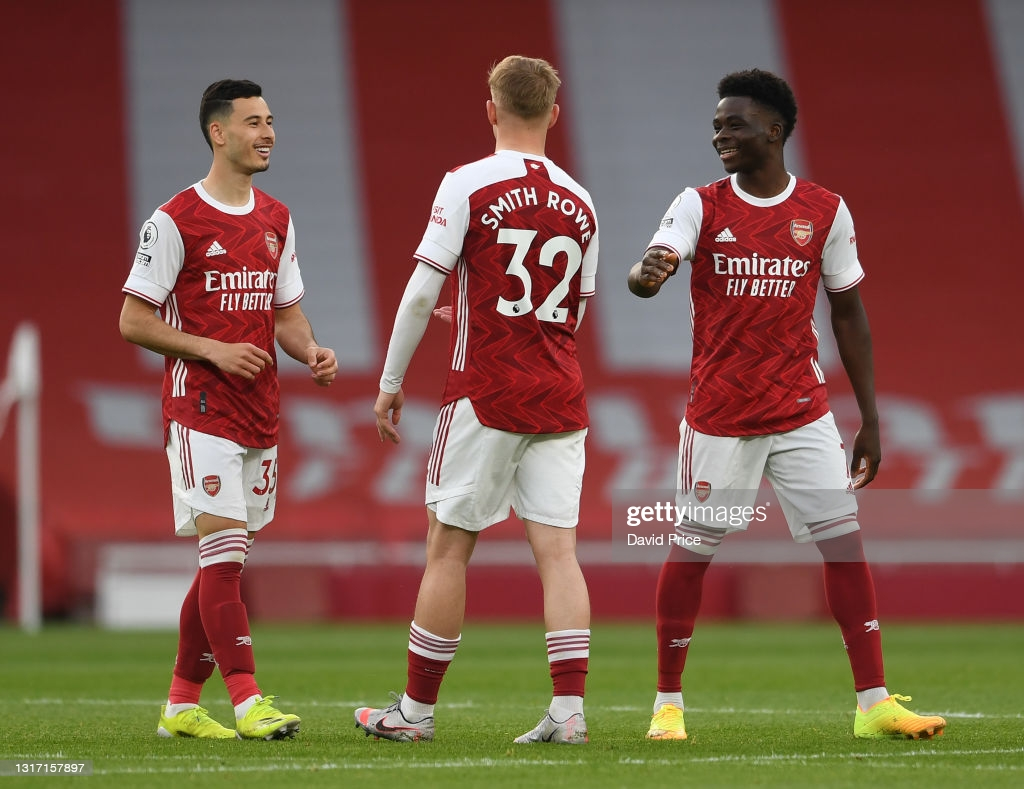

In [408]:
#Soon out-of-contract players 
arsenal.sort_values(by='contract_valid_until',ascending=True).head(10)

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,loaned_from,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,prefered_posn,Category,reference_potential
0,P. Aubameyang,31,187,80,Gabon,Arsenal,English Premier League,87,87,45.000,170.0,"ST, LW",Right,3,4,4,High/High,85.5,#Speedster,LW,NaN,2018,2021.0,93.0,86.0,75.0,80.0,38.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Speed Dribbler (AI...",76,91,75,77,84,80,81,76,64,82,91,94,77,88,68,82,75,80,74,78,43,48,93,77,78,88,NaN,29,36,6,9,15,9,9,ST,ATT,0
30,M. Macey,25,198,93,England,Arsenal,English Premier League,65,70,0.525,12.0,GK,Right,1,2,1,Medium/Medium,1.0,NaN,SUB,NaN,2013,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,65.0,65.0,66.0,39.0,64.0,NaN,18,16,16,27,16,16,16,17,24,19,38,40,37,59,33,49,52,33,67,16,25,15,12,36,22,52,NaN,11,14,63,65,65,64,66,GK,GK,5
14,S. Mustafi,28,184,83,Germany,Arsenal,English Premier League,78,80,10.500,72.0,CB,Right,3,2,2,Medium/High,20.7,NaN,RCB,NaN,2016,2021.0,58.0,57.0,63.0,61.0,77.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,Dives Into Tackles (AI),53,58,81,75,51,53,55,47,69,70,55,61,63,76,67,66,81,68,78,52,87,75,49,55,54,73,NaN,79,78,11,9,15,10,6,CB,DEF,2
11,Sokratis,32,186,84,Greece,Arsenal,English Premier League,79,79,8.000,76.0,CB,Right,3,2,2,Medium/High,15.2,#Strength,RES,NaN,2018,2021.0,66.0,53.0,52.0,59.0,78.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,Solid Player,47,47,80,63,50,58,29,35,58,60,63,69,52,77,59,77,82,67,86,48,88,76,49,45,38,74,NaN,78,79,6,8,5,12,5,CB,DEF,0
10,David Luiz,33,189,86,Brazil,Arsenal,English Premier League,80,80,7.000,80.0,CB,Right,4,3,3,Medium/Medium,13.3,NaN,CB,NaN,2019,2021.0,60.0,65.0,74.0,71.0,79.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Leadership, Long Passer (AI),...",68,55,80,77,63,68,70,72,80,79,59,61,66,76,56,81,77,68,78,72,85,80,54,71,75,75,NaN,81,79,11,12,10,7,14,CB,DEF,0
8,Dani Ceballos,23,179,68,Spain,Arsenal,English Premier League,80,85,19.500,76.0,"CM, CAM",Right,2,3,4,High/Medium,NaN,NaN,RCM,Real Madrid,nan,2021.0,69.0,70.0,79.0,83.0,69.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Technical Dribbler (AI)",74,68,41,82,62,83,77,63,80,85,72,67,78,80,79,76,51,77,65,73,76,76,76,82,55,80,NaN,75,74,12,15,16,7,13,CM,MID,5
32,F. Balogun,18,179,70,England,Arsenal,English Premier League,60,80,0.425,4.0,ST,Right,1,4,3,High/Medium,1.2,NaN,RES,NaN,2019,2021.0,74.0,59.0,42.0,60.0,20.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,62,53,47,51,58,43,37,33,59,75,73,72,60,64,60,54,66,64,53,49,18,63,45,52,60,NaN,15,16,10,12,12,13,10,ST,ATT,20
4,M. Özil,31,180,71,Germany,Arsenal,English Premier League,82,82,19.500,100.0,"CAM, RW",Left,4,2,4,Medium/Low,37.1,#Playmaker,RES,NaN,2013,2021.0,64.0,69.0,85.0,83.0,24.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Flair, Playmaker (AI), Outside F...",81,68,51,88,78,82,84,75,82,88,67,61,75,81,71,70,45,62,56,67,44,24,80,90,67,83,NaN,16,19,6,14,10,6,14,CAM,MID,0
28,E. Nketiah,21,175,72,England,Arsenal,English Premier League,71,83,4.300,35.0,ST,Right,1,3,3,High/Medium,9.0,NaN,SUB,NaN,2015,2022.0,83.0,69.0,54.0,74.0,23.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,73,57,65,6

- We can see that a total of 8 players are there whose contract is expiring in next 1 year so the manager can check whom to extend whom to not .
- We can see that there are total of 3 defenders who's contract is about to expire in 1 year which means we need to look for defender for sure.

### Transfer Strategy

- We need a experienced defender who can replace the void left when Sokratis & David Luiz leave the club.
- Get another backup English defender who can be called upon when needed.
- With Kolasinac leaving we need a backup LB position.
- Need a deep lying playmaker who can play alongwith Xhaka in middle.
- Need a CAM who we can target when Ozil is leaving.
- Need a estabilished LW with whom Saka can be rotated.

### Search for Defender

In [409]:
arsenal_def

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,loaned_from,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,prefered_posn,Category,reference_potential
7,Héctor Bellerín,25,178,74,Spain,Arsenal,English Premier League,80,85,17.5,76.0,"RB, RWB",Right,3,2,3,High/Low,34.6,NaN,RWB,NaN,2014,2023.0,85.0,51.0,70.0,77.0,76.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,Speed Dribbler (AI),75,52,60,77,41,77,63,50,59,77,84,86,78,79,77,52,64,75,58,43,72,78,67,66,62,70,NaN,78,79,8,14,14,13,12,RB,DEF,5
10,David Luiz,33,189,86,Brazil,Arsenal,English Premier League,80,80,7.0,80.0,CB,Right,4,3,3,Medium/Medium,13.3,NaN,CB,NaN,2019,2021.0,60.0,65.0,74.0,71.0,79.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Leadership, Long Passer (AI),...",68,55,80,77,63,68,70,72,80,79,59,61,66,76,56,81,77,68,78,72,85,80,54,71,75,75,NaN,81,79,11,12,10,7,14,CB,DEF,0
11,Sokratis,32,186,84,Greece,Arsenal,English Premier League,79,79,8.0,76.0,CB,Right,3,2,2,Medium/High,15.2,#Strength,RES,NaN,2018,2021.0,66.0,53.0,52.0,59.0,78.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,Solid Player,47,47,80,63,50,58,29,35,58,60,63,69,52,77,59,77,82,67,86,48,88,76,49,45,38,74,NaN,78,79,6,8,5,12,5,CB,DEF,0
12,K. Tierney,23,178,76,Scotland,Arsenal,English Premier League,78,86,13.5,59.0,"LB, LWB",Left,1,3,3,High/High,28.4,NaN,LCB,NaN,2019,2024.0,86.0,59.0,72.0,75.0,72.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Speed Dribbler (AI),77,52,59,73,27,75,72,56,68,74,85,86,76,74,77,79,80,85,76,66,82,72,67,72,36,74,NaN,74,74,13,16,8,12,13,LB,DEF,8
13,Gabriel,22,190,87,Brazil,Arsenal,English Premier League,78,85,13.0,59.0,CB,Left,1,2,2,Medium/High,27.3,NaN,SUB,NaN,2020,2025.0,55.0,36.0,59.0,55.0,79.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,31,80,73,28,49,47,27,68,66,60,50,51,76,37,51,70,67,84,30,78,78,44,59,40,74,NaN,81,78,12,8,13,10,7,CB,DEF,7
14,S. Mustafi,28,184,83,Germany,Arsenal,English Premier League,78,80,10.5,72.0,CB,Right,3,2,2,Medium/High,20.7,NaN,RCB,NaN,2016,2021.0,58.0,57.0,63.0,61.0,77.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,Dives Into Tackles (AI),53,58,81,75,51,53,55,47,69,70,55,61,63,76,67,66,81,68,78,52,87,75,49,55,54,73,NaN,79,78,11,9,15,10,6,CB,DEF,2
15,S. Kolašinac,27,183,86,Bosnia Herzegovina,Arsenal,English Premier League,78,79,10.5,69.0,"LB, LWB",Left,2,2,3,High/Medium,20.7,#Strength,SUB,NaN,2017,2022.0,73.0,63.0,71.0,73.0,74.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,57,74,78,55,75,61,42,62,76,69,77,60,72,55,82,79,78,90,58,93,70,73,74,54,72,NaN,79,77,15,9,16,7,9,LB,DEF,1
17,A. Maitland-Niles,22,177,70,England,Arsenal,English Premier League,76,84,10.0,52.0,"RWB, RB, RM",Right,1,3,4,Medium/Medium,21.0,NaN,LWB,NaN,2014,2023.0,83.0,59.0,69.0,76.0,69.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Speed Dribbler (AI),71,56,54,74,44,77,60,36,67,76,82,83,79,73,71,65,55,77,66,62,64,71,66,72,54,77,NaN,73,69,15,9,7,10,13,RWB,DEF,8
19,Cédric,28,172,67,Portugal,Arsenal,English Premier League,76,76,6.5,63.0,"RB, RWB",Right,2,4,3,High/Medium,12.4,NaN,SUB,NaN,2020,2024.0,76.0,65.0,70.0,75.0,72.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,Early Crosser,70,57,65,75,68,75,66,64,69,76,77,75,73,74,83,76,72,75,59,70,75,74,71,65,

In [410]:
# Defender distribution based on prefered position
fig = px.bar(arsenal_def.groupby(by=['prefered_posn']).count()['club_name'],
             x=arsenal_def.groupby(by=['prefered_posn']).count()['club_name'].index,
             y=arsenal_def.groupby(by=['prefered_posn']).count()['club_name'].values,
             labels={"x": "Prefered Position",  "y": "No. of Players"},
             title='Defender distribution based on categories')
fig.show()

- We can try to target 2 CBs one a little experienced and another a British CB who can play as backup as there are many defenders whose contract are running out and its better to replace. 

In [411]:
#CB Shortlist
CB_shortlist=player_list[player_list['prefered_posn']=='CB']

#### First we will go with experienced defender<br>
- The age of defender should be greater then 24
- Have overall potential >80
- Should cost in between 20 to 45 millions
- Should not be not playing in EPL
- Will be good if have some potential so have resale value

In [412]:
#Shortlisting
def_1=CB_shortlist[CB_shortlist['age']>24]
def_1=def_1[def_1['overall']>80]
def_1=def_1[def_1['league_name']!='English Premier League']
def_1=def_1.loc[(def_1['value_eur']>=20) & (def_1['value_eur']<=45)]

In [413]:
#Growth Potential is more than 1
def_1=def_1[def_1['reference_potential']>1]
def_1.reset_index(drop=True)
def_plot=def_1[['short_name','skill_long_passing','defending','physic','mentality_interceptions','mentality_aggression','movement_reactions','mentality_composure','defending_standing_tackle','defending_sliding_tackle']]

In [414]:
#Converting data for plot
def_plot=def_plot.T
def_plot.rename(columns=def_plot.iloc[0], inplace = True)

In [415]:
def_plot

,Marquinhos,C. Lenglet,M. Škriniar,J. Giménez,A. Romagnoli,S. Umtiti,Diego Carlos
short_name,Marquinhos,C. Lenglet,M. Škriniar,J. Giménez,A. Romagnoli,S. Umtiti,Diego Carlos
skill_long_passing,82,74,69,62,71,73,74
defending,87.0,87.0,87.0,86.0,85.0,83.0,82.0
physic,78.0,81.0,81.0,83.0,78.0,79.0,83.0
mentality_interceptions,86,87,86,85,86,84,84
mentality_aggression,80,80,86,89,85,82,85
movement_reactions,85,84,83,79,80,80,82
mentality_composure,86,82,81,75,76,82,75
defending_standing_tackle,87,86,87,87,86,84,82
defending_sliding_tackle,87,81,83,86,82,83,81


In [416]:
#Radar Plot
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=def_plot.iloc[1:,0].values.tolist(), 
                              theta=def_plot.iloc[1:,0].index.tolist(),
                              fill='toself',
                              name=def_plot.iloc[0:1,0].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot.iloc[1:,1].values.tolist(), 
                              theta=def_plot.iloc[1:,1].index.tolist(),
                              fill='toself',
                              name=def_plot.iloc[0:1,1].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot.iloc[1:,2].values.tolist(), 
                              theta=def_plot.iloc[1:,2].index.tolist(),
                              fill='toself',
                              name=def_plot.iloc[0:1,2].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot.iloc[1:,3].values.tolist(), 
                              theta=def_plot.iloc[1:,3].index.tolist(),
                              fill='toself',
                              name=def_plot.iloc[0:1,3].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot.iloc[1:,4].values.tolist(), 
                              theta=def_plot.iloc[1:,4].index.tolist(),
                              fill='toself',
                              name=def_plot.iloc[0:1,4].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot.iloc[1:,5].values.tolist(), 
                              theta=def_plot.iloc[1:,5].index.tolist(),
                              fill='toself',
                              name=def_plot.iloc[0:1,5].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot.iloc[1:,6].values.tolist(), 
                              theta=def_plot.iloc[1:,6].index.tolist(),
                              fill='toself',
                              name=def_plot.iloc[0:1,6].tolist()[0]))


fig.update_layout(title="Experienced Defender Stats Distribution")

fig.show()

The Recruitment team is recommeding for the above 7 defenders for the mentioned category with Marquinhos having most uniform stats distribution among all the other players.

#### Next we will go with relatively less experience defender to fill in as a backup<br>
- The age of defender should be less then 24
- Should have great potential 
- Overall should be greater then 70
- Should cost less than 20 millions
- Should be English

In [417]:
#Shortlisting
def_2=CB_shortlist[CB_shortlist['age']<24]
def_2=def_2[def_2['overall']>70]
def_2=def_2[def_2['nationality']=='England']
def_2=def_2.loc[(def_2['value_eur']<=20)]

In [418]:
def_2.reset_index(drop=True)
def_plot2=def_2[['short_name','skill_long_passing','defending','physic','mentality_interceptions','mentality_aggression','movement_reactions','mentality_composure','defending_standing_tackle','defending_sliding_tackle']]
#Converting data for plot
def_plot2=def_plot2.T
def_plot2.rename(columns=def_plot2.iloc[0], inplace = True)

In [419]:
def_plot2

,M. Holgate,B. White,A. Tuanzebe,B. Godfrey,J. Worrall,E. Konsa,M. Clarke
short_name,M. Holgate,B. White,A. Tuanzebe,B. Godfrey,J. Worrall,E. Konsa,M. Clarke
skill_long_passing,75,67,70,63,52,66,60
defending,78.0,76.0,73.0,71.0,73.0,71.0,70.0
physic,74.0,75.0,73.0,77.0,76.0,72.0,81.0
mentality_interceptions,78,78,71,69,73,72,68
mentality_aggression,79,72,73,72,71,72,78
movement_reactions,77,74,73,70,69,71,64
mentality_composure,74,75,77,68,62,70,74
defending_standing_tackle,79,75,74,72,70,73,70
defending_sliding_tackle,77,77,73,73,74,72,69


In [420]:
#Radar Plot
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=def_plot2.iloc[1:,0].values.tolist(), 
                              theta=def_plot2.iloc[1:,0].index.tolist(),
                              fill='toself',
                              name=def_plot2.iloc[0:1,0].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot2.iloc[1:,1].values.tolist(), 
                              theta=def_plot2.iloc[1:,1].index.tolist(),
                              fill='toself',
                              name=def_plot2.iloc[0:1,1].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot2.iloc[1:,2].values.tolist(), 
                              theta=def_plot2.iloc[1:,2].index.tolist(),
                              fill='toself',
                              name=def_plot2.iloc[0:1,2].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot2.iloc[1:,3].values.tolist(), 
                              theta=def_plot2.iloc[1:,3].index.tolist(),
                              fill='toself',
                              name=def_plot2.iloc[0:1,3].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot2.iloc[1:,4].values.tolist(), 
                              theta=def_plot2.iloc[1:,4].index.tolist(),
                              fill='toself',
                              name=def_plot2.iloc[0:1,4].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot2.iloc[1:,5].values.tolist(), 
                              theta=def_plot2.iloc[1:,5].index.tolist(),
                              fill='toself',
                              name=def_plot2.iloc[0:1,5].tolist()[0]))


fig.update_layout(title="BackUp Defender Stats Distribution")

fig.show()

- We can go with Holgate or Konsa as they are the having most uniform distribution of skills compared to other shortlisted.

### Backup LB

- Should be young
- Should cost less then 10 million
- Have good potential
- Have good crossing and tackle stats

In [421]:
#LB Shortlist
LB_shortlist=player_list[(player_list['prefered_posn']=='LB') | (player_list['prefered_posn']=='LWB')]

In [422]:
def_6=LB_shortlist[LB_shortlist['age']<23]
def_6=def_6[def_6['overall']>60]
def_6=def_6.loc[(def_6['value_eur']<=10)]
def_6=def_6.loc[(def_6['reference_potential']>=10)]
def_6=def_6.loc[(def_6['attacking_crossing']>70)]
def_6=def_6.loc[(def_6['defending_standing_tackle']>70)]

In [423]:
def_6.reset_index(drop=True)
def_plot6=def_6[['short_name','skill_long_passing','defending','dribbling','attacking_crossing','skill_dribbling','skill_ball_control','movement_sprint_speed','movement_agility','mentality_composure','mentality_positioning','power_stamina','defending_standing_tackle']]
#Converting data for plot
def_plot6=def_plot6.T
def_plot6.rename(columns=def_plot6.iloc[0], inplace = True)

In [424]:
def_plot6

,Adrià Pedrosa,Álex Centelles,L. Pellegrini,Nuno Tavares,M. Valenzuela
short_name,Adrià Pedrosa,Álex Centelles,L. Pellegrini,Nuno Tavares,M. Valenzuela
skill_long_passing,71,70,62,50,54
defending,69.0,69.0,67.0,66.0,69.0
dribbling,75.0,69.0,69.0,74.0,69.0
attacking_crossing,75,73,78,79,72
skill_dribbling,74,68,68,75,67
skill_ball_control,76,74,72,73,65
movement_sprint_speed,89,76,75,88,70
movement_agility,80,64,64,77,80
mentality_composure,68,74,67,73,62


In [425]:
#Radar Plot
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=def_plot6.iloc[1:,0].values.tolist(), 
                              theta=def_plot6.iloc[1:,0].index.tolist(),
                              fill='toself',
                              name=def_plot6.iloc[0:1,0].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot6.iloc[1:,1].values.tolist(), 
                              theta=def_plot6.iloc[1:,1].index.tolist(),
                              fill='toself',
                              name=def_plot6.iloc[0:1,1].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot6.iloc[1:,2].values.tolist(), 
                              theta=def_plot6.iloc[1:,2].index.tolist(),
                              fill='toself',
                              name=def_plot6.iloc[0:1,2].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot6.iloc[1:,3].values.tolist(), 
                              theta=def_plot6.iloc[1:,3].index.tolist(),
                              fill='toself',
                              name=def_plot6.iloc[0:1,3].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot6.iloc[1:,4].values.tolist(), 
                              theta=def_plot6.iloc[1:,4].index.tolist(),
                              fill='toself',
                              name=def_plot6.iloc[0:1,4].tolist()[0]))


fig.update_layout(title="BackUp Left-Back Stats Distribution")

fig.show()

- Based on above stats it we can suggest to target Adrià Pedrosa as he has better all-round capabilites then others. Second will be Nuno Tavares.

### Search for Midfielder and Attacker

In [426]:
arsenal_mid

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,loaned_from,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,prefered_posn,Category,reference_potential
3,N. Pépé,25,183,73,Ivory Coast,Arsenal,English Premier League,82,85,28.0,98.0,"RM, RW",Left,1,2,4,High/Medium,55.3,#Acrobat,RW,NaN,2019,2024.0,89.0,78.0,75.0,84.0,33.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Flair, Long Shot Taker (AI), Spe...",78,77,57,74,70,85,79,79,67,81,88,90,89,83,79,80,68,79,68,77,43,28,80,80,85,77,NaN,27,25,11,14,11,6,8,RM,MID,3
4,M. Özil,31,180,71,Germany,Arsenal,English Premier League,82,82,19.5,100.0,"CAM, RW",Left,4,2,4,Medium/Low,37.1,#Playmaker,RES,NaN,2013,2021.0,64.0,69.0,85.0,83.0,24.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Flair, Playmaker (AI), Outside F...",81,68,51,88,78,82,84,75,82,88,67,61,75,81,71,70,45,62,56,67,44,24,80,90,67,83,NaN,16,19,6,14,10,6,14,CAM,MID,0
6,L. Torreira,24,168,65,Uruguay,Arsenal,English Premier League,81,85,21.0,74.0,"CDM, CM",Right,2,3,3,Medium/High,41.5,NaN,SUB,NaN,2018,2023.0,74.0,67.0,75.0,79.0,79.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,61,59,80,65,77,70,72,75,79,76,72,85,78,90,78,52,83,67,74,86,83,68,74,48,78,NaN,83,77,5,5,13,7,9,CDM,MID,4
8,Dani Ceballos,23,179,68,Spain,Arsenal,English Premier League,80,85,19.5,76.0,"CM, CAM",Right,2,3,4,High/Medium,NaN,NaN,RCM,Real Madrid,nan,2021.0,69.0,70.0,79.0,83.0,69.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Technical Dribbler (AI)",74,68,41,82,62,83,77,63,80,85,72,67,78,80,79,76,51,77,65,73,76,76,76,82,55,80,NaN,75,74,12,15,16,7,13,CM,MID,5
9,G. Xhaka,27,185,80,Switzerland,Arsenal,English Premier League,80,81,15.0,80.0,"CDM, CM",Left,3,3,3,Low/Medium,29.6,NaN,LCM,NaN,2016,2023.0,52.0,65.0,80.0,69.0,70.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Dives Into Tackles (AI), Long...",71,50,62,85,50,66,76,77,85,80,48,55,49,73,61,90,31,82,79,75,91,72,67,80,63,67,NaN,71,68,7,8,11,7,13,CDM,MID,1
16,M. Guendouzi,21,185,80,France,Arsenal,English Premier League,77,86,12.5,46.0,"CDM, CM",Right,1,3,3,Medium/High,26.3,NaN,RES,NaN,2018,2023.0,73.0,63.0,76.0,75.0,72.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,Long Passer (AI),67,56,67,79,55,75,72,67,80,77,71,75,73,75,70,74,68,79,72,68,78,73,67,79,62,77,NaN,73,70,6,13,6,13,11,CDM,MID,9
18,M. Elneny,27,181,74,Egypt,Arsenal,English Premier League,76,77,8.0,60.0,"CDM, CM",Right,1,3,3,Medium/High,15.8,NaN,SUB,NaN,2016,2022.0,55.0,63.0,72.0,70.0,73.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,Solid Player,66,57,61,78,39,68,69,56,77,75,55,55,65,74,62,78,69,87,68,67,73,75,63,67,62,75,NaN,74,72,7,15,15,12,6,CDM,MID,1
20,B. Saka,18,178,65,England,Arsenal,English Premier League,75,88,12.0,22.0,"LM, LWB, RW",Left,1,4,3,High/Medium,30.3,NaN,SUB,NaN,2018,2025.0,84.0,61.0,71.0,78.0,55.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,Technical Dribbler (AI),79,60,45,74,55,78,72,48,63,76,86,82,83,71,82,64,51,76,58,60,64,53,68,71,58,70,NaN,58,62,7,8,13,9,13,LM,MID,13
27,J. Willock,20,186,76,England,Arsenal,English Premier League,71,85,5.0,31.0,"CAM, CM",Right,1,3,3,High/High,12.6,NaN,SUB,NaN,2016,2022.0,75.0,64.0,66.0,73.0,57.0,67.0,NaN,NaN

In [427]:
arsenal_att

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,loaned_from,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,prefered_posn,Category,reference_potential
0,P. Aubameyang,31,187,80,Gabon,Arsenal,English Premier League,87,87,45.000,170.0,"ST, LW",Right,3,4,4,High/High,85.5,#Speedster,LW,NaN,2018,2021.0,93.0,86.0,75.0,80.0,38.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Speed Dribbler (AI...",76,91,75,77,84,80,81,76,64,82,91,94,77,88,68,82,75,80,74,78,43,48,93,77,78,88,NaN,29,36,6,9,15,9,9,ST,ATT,0
2,A. Lacazette,29,176,77,France,Arsenal,English Premier League,83,83,26.000,125.0,ST,Right,3,4,4,High/High,49.4,NaN,ST,NaN,2017,2022.0,76.0,82.0,75.0,84.0,46.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Outside Foot Shot, Technical Dribbler (AI)",68,83,75,79,79,84,74,74,70,85,77,75,81,84,82,87,76,77,75,78,74,42,84,78,76,81,NaN,51,32,11,6,9,5,6,ST,ATT,0
5,Willian,31,175,77,Brazil,Arsenal,English Premier League,82,82,19.500,110.0,"RW, LW, RM",Right,3,4,4,High/High,37.1,"#Dribbler, #Acrobat",SUB,NaN,2020,2023.0,82.0,79.0,80.0,85.0,49.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Flair, Technical Dribbler (AI)",76,77,31,80,59,88,83,84,77,82,86,78,86,80,79,84,32,77,59,81,45,55,79,83,79,79,NaN,57,51,14,12,13,7,13,RW,ATT,0
25,Gabriel Martinelli,19,180,69,Brazil,Arsenal,English Premier League,74,85,9.500,38.0,"LW, LM, ST",Right,1,3,3,High/High,20.0,NaN,RES,NaN,2019,2023.0,86.0,69.0,62.0,76.0,44.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Outside Foot Shot, Technical Dri...",66,74,68,67,61,76,70,49,45,75,87,86,83,73,79,68,43,76,61,60,75,37,74,65,60,73,NaN,40,43,10,6,7,6,6,LW,ATT,11
26,R. Nelson,20,180,75,England,Arsenal,English Premier League,72,82,5.000,39.0,"RW, LW, LM",Right,1,3,4,High/Medium,10.5,NaN,RES,NaN,2016,2022.0,85.0,64.0,66.0,77.0,34.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Technical Dribbler (AI)",65,69,39,68,55,77,66,67,58,76,85,85,83,64,76,67,41,67,52,54,42,42,70,67,54,60,NaN,37,37,12,12,11,11,15,RW,ATT,10
28,E. Nketiah,21,175,72,England,Arsenal,English Premier League,71,83,4.300,35.0,ST,Right,1,3,3,High/Medium,9.0,NaN,SUB,NaN,2015,2022.0,83.0,69.0,54.0,74.0,23.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,73,57,65,67,74,54,38,45,72,85,82,79,74,72,69,73,68,59,62,52,19,74,58,57,68,NaN,19,15,12,10,11,9,5,ST,ATT,12
32,F. Balogun,18,179,70,England,Arsenal,English Premier League,60,80,0.425,4.0,ST,Right,1,4,3,High/Medium,1.2,NaN,RES,NaN,2019,2021.0,74.0,59.0,42.0,60.0,20.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,62,53,47,51,58,43,37,33,59,75,73,72,60,64,60,54,66,64,53,49,18,63,45,52,60,NaN,15,16,10,12,12,13,10,ST,ATT,20


Based on the above two list we observe following :
- Need of a estabilised deep-lying playmaker to increase creativity.
- Need another CAM young profile who can also fill in other position.
- Need estabilised LW.

#### Searching Deep-Lying Midfielder

In [428]:
cm_shortlist=player_list[(player_list['prefered_posn']=='CM') | (player_list['prefered_posn']=='CDM')]

#### for deep-lying midfielder
- value should be less than 30 millions
- Should be appoaching peak of career ( Age below 30)
- passing should be greater than 80
- attacking_short_passing , skill_long_passing should be greater then 75
- should have some potential so resale value is there.

In [429]:
cm_shortlist=cm_shortlist[cm_shortlist['passing']>80]
cm_shortlist=cm_shortlist[cm_shortlist['value_eur']<=35]
cm_shortlist=cm_shortlist[cm_shortlist['attacking_short_passing']>75]
cm_shortlist=cm_shortlist[cm_shortlist['skill_long_passing']>75]
cm_shortlist=cm_shortlist[cm_shortlist['age']<30]
cm_shortlist=cm_shortlist[cm_shortlist['reference_potential']>0]

In [430]:
cm_shortlist.reset_index(drop=True)
def_plot3=cm_shortlist[['short_name','passing','defending','attacking_short_passing','movement_reactions','skill_long_passing','mentality_composure','skill_ball_control','power_stamina','mentality_positioning','defending_standing_tackle']]
#Converting data for plot
def_plot3=def_plot3.T
def_plot3.rename(columns=def_plot3.iloc[0], inplace = True)
def_plot3

,T. Partey,Rúben Neves,Y. Tielemans,P. Zieliński,Campaña,J. Ward-Prowse,J. Veretout,R. Malinovskyi
short_name,T. Partey,Rúben Neves,Y. Tielemans,P. Zieliński,Campaña,J. Ward-Prowse,J. Veretout,R. Malinovskyi
passing,81.0,84.0,82.0,81.0,82.0,85.0,81.0,81.0
defending,82.0,71.0,69.0,70.0,70.0,66.0,74.0,66.0
attacking_short_passing,86,86,84,84,84,85,85,82
movement_reactions,85,79,78,76,78,75,79,74
skill_long_passing,84,87,82,80,81,82,80,81
mentality_composure,86,83,83,75,83,79,82,75
skill_ball_control,83,82,83,85,84,82,82,82
power_stamina,92,78,78,71,82,90,77,81
mentality_positioning,73,65,80,77,73,67,73,70


In [431]:
#Radar Plot
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=def_plot3.iloc[1:,0].values.tolist(), 
                              theta=def_plot3.iloc[1:,0].index.tolist(),
                              fill='toself',
                              name=def_plot3.iloc[0:1,0].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot3.iloc[1:,1].values.tolist(), 
                              theta=def_plot3.iloc[1:,1].index.tolist(),
                              fill='toself',
                              name=def_plot3.iloc[0:1,1].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot3.iloc[1:,2].values.tolist(), 
                              theta=def_plot3.iloc[1:,2].index.tolist(),
                              fill='toself',
                              name=def_plot3.iloc[0:1,2].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot3.iloc[1:,3].values.tolist(), 
                              theta=def_plot3.iloc[1:,3].index.tolist(),
                              fill='toself',
                              name=def_plot3.iloc[0:1,3].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot3.iloc[1:,4].values.tolist(), 
                              theta=def_plot3.iloc[1:,4].index.tolist(),
                              fill='toself',
                              name=def_plot3.iloc[0:1,4].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot3.iloc[1:,5].values.tolist(), 
                              theta=def_plot3.iloc[1:,5].index.tolist(),
                              fill='toself',
                              name=def_plot3.iloc[0:1,5].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot3.iloc[1:,6].values.tolist(), 
                              theta=def_plot3.iloc[1:,6].index.tolist(),
                              fill='toself',
                              name=def_plot3.iloc[0:1,6].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot3.iloc[1:,7].values.tolist(), 
                              theta=def_plot3.iloc[1:,7].index.tolist(),
                              fill='toself',
                              name=def_plot3.iloc[0:1,7].tolist()[0]))


fig.update_layout(title="Deep-Lying Midfielder Stats Distribution")

fig.show()

- Thomas Partey seems to be good fit as his all-round stats distribution comes to be greater than 80 with value less than 35 million and aged 27 this seems to be a bargain. Otherwise we can target Ruben Neves

#### Searching CAM 

- Should be high potential player (greater than 80)
- Should be younger than 22
- Market value should be less than 20 mils
- Passing , Shooting , Dribbling should be greater than 70

In [432]:
cam_shortlist=player_list[(player_list['prefered_posn']=='CAM')]

In [433]:
cam_shortlist=cam_shortlist[cam_shortlist['potential']>80]
cam_shortlist=cam_shortlist[cam_shortlist['age']<22]
cam_shortlist=cam_shortlist[cam_shortlist['value_eur']<20]
cam_shortlist=cam_shortlist[cam_shortlist['passing']>70]
cam_shortlist=cam_shortlist[cam_shortlist['shooting']>70]
cam_shortlist=cam_shortlist[cam_shortlist['dribbling']>70]

In [434]:
cam_shortlist.reset_index(drop=True)
def_plot4=cam_shortlist[['short_name','shooting','passing','dribbling','skill_dribbling','skill_long_passing','movement_agility','movement_balance','mentality_vision','movement_sprint_speed']]
#Converting data for plot
def_plot4=def_plot4.T
def_plot4.rename(columns=def_plot4.iloc[0], inplace = True)
def_plot4

,Matheus Cunha,N. Zaniolo,L. Fernández,D. Szoboszlai,A. Mac Allister,Kangin Lee
short_name,Matheus Cunha,N. Zaniolo,L. Fernández,D. Szoboszlai,A. Mac Allister,Kangin Lee
shooting,79.0,73.0,76.0,75.0,75.0,72.0
passing,72.0,72.0,73.0,76.0,77.0,75.0
dribbling,84.0,77.0,78.0,78.0,74.0,79.0
skill_dribbling,85,78,79,80,74,79
skill_long_passing,65,70,69,77,75,72
movement_agility,83,71,81,75,71,84
movement_balance,78,78,85,64,72,87
mentality_vision,72,76,77,74,77,80
movement_sprint_speed,79,76,71,82,69,70


In [435]:
#Radar Plot
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=def_plot4.iloc[1:,0].values.tolist(), 
                              theta=def_plot4.iloc[1:,0].index.tolist(),
                              fill='toself',
                              name=def_plot4.iloc[0:1,0].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot4.iloc[1:,1].values.tolist(), 
                              theta=def_plot4.iloc[1:,1].index.tolist(),
                              fill='toself',
                              name=def_plot4.iloc[0:1,1].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot4.iloc[1:,2].values.tolist(), 
                              theta=def_plot4.iloc[1:,2].index.tolist(),
                              fill='toself',
                              name=def_plot4.iloc[0:1,2].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot4.iloc[1:,3].values.tolist(), 
                              theta=def_plot4.iloc[1:,3].index.tolist(),
                              fill='toself',
                              name=def_plot4.iloc[0:1,3].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot4.iloc[1:,4].values.tolist(), 
                              theta=def_plot4.iloc[1:,4].index.tolist(),
                              fill='toself',
                              name=def_plot4.iloc[0:1,4].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot4.iloc[1:,5].values.tolist(), 
                              theta=def_plot4.iloc[1:,5].index.tolist(),
                              fill='toself',
                              name=def_plot4.iloc[0:1,5].tolist()[0]))

fig.update_layout(title="CAM Stats Distribution")

fig.show()

- Based on above plot we can say that we can target Zaniolo or if we want with premier league experience we can go with Mac Allister.

### Searching for LW

- Should clost less than 30 million
- Should have good internation reputation
- Should have good dribbling , pace , crossing , ball control and stamina

In [436]:
lw_shortlist=player_list[(player_list['prefered_posn']=='LW') | (player_list['prefered_posn']=='LM')]

In [437]:
lw_shortlist=lw_shortlist[lw_shortlist['value_eur']<30]
lw_shortlist=lw_shortlist[lw_shortlist['international_reputation']>1]
lw_shortlist=lw_shortlist[lw_shortlist['dribbling']>80]
lw_shortlist=lw_shortlist[lw_shortlist['pace']>80]
lw_shortlist=lw_shortlist[lw_shortlist['attacking_crossing']>75]
lw_shortlist=lw_shortlist[lw_shortlist['skill_ball_control']>75]
lw_shortlist=lw_shortlist[lw_shortlist['power_stamina']>70]

In [438]:
lw_shortlist.reset_index(drop=True)
def_plot5=lw_shortlist[['short_name','pace','passing','dribbling','skill_dribbling','skill_ball_control','movement_acceleration','movement_agility','movement_balance','mentality_vision']]
#Converting data for plot
def_plot5=def_plot5.T
def_plot5.rename(columns=def_plot5.iloc[0], inplace = True)
def_plot5

,Muniain,W. Zaha,T. Hazard,F. Kostić,Rafa,Y. Carrasco,Gonçalo Guedes
short_name,Muniain,W. Zaha,T. Hazard,F. Kostić,Rafa,Y. Carrasco,Gonçalo Guedes
pace,81.0,90.0,84.0,88.0,94.0,91.0,87.0
passing,80.0,72.0,81.0,79.0,74.0,75.0,76.0
dribbling,87.0,87.0,86.0,83.0,87.0,84.0,81.0
skill_dribbling,87,90,86,85,88,86,83
skill_ball_control,86,86,84,83,85,82,80
movement_acceleration,83,88,86,89,93,90,85
movement_agility,92,87,91,76,90,90,80
movement_balance,95,79,88,77,89,71,77
mentality_vision,83,76,83,81,78,69,77


In [439]:
#Radar Plot
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=def_plot5.iloc[1:,0].values.tolist(), 
                              theta=def_plot5.iloc[1:,0].index.tolist(),
                              fill='toself',
                              name=def_plot5.iloc[0:1,0].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot5.iloc[1:,1].values.tolist(), 
                              theta=def_plot5.iloc[1:,1].index.tolist(),
                              fill='toself',
                              name=def_plot5.iloc[0:1,1].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot5.iloc[1:,2].values.tolist(), 
                              theta=def_plot5.iloc[1:,2].index.tolist(),
                              fill='toself',
                              name=def_plot5.iloc[0:1,2].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot5.iloc[1:,3].values.tolist(), 
                              theta=def_plot5.iloc[1:,3].index.tolist(),
                              fill='toself',
                              name=def_plot5.iloc[0:1,3].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot5.iloc[1:,4].values.tolist(), 
                              theta=def_plot5.iloc[1:,4].index.tolist(),
                              fill='toself',
                              name=def_plot5.iloc[0:1,4].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot5.iloc[1:,5].values.tolist(), 
                              theta=def_plot5.iloc[1:,5].index.tolist(),
                              fill='toself',
                              name=def_plot5.iloc[0:1,5].tolist()[0]))

fig.add_trace(go.Scatterpolar(r=def_plot5.iloc[1:,6].values.tolist(), 
                              theta=def_plot5.iloc[1:,6].index.tolist(),
                              fill='toself',
                              name=def_plot5.iloc[0:1,6].tolist()[0]))


fig.update_layout(title="LW Stats Distribution")

fig.show()

- Based on stats we recommend going for Muniain or Rafa or if we want a high potential player we can go with Guedes or else if we want one with premier league experience we can go with Zaha

### Conclusion

- Have a pretty imbalance squad in the midfield and defence area.
- Need to renew contracts carefully.
- Defence needs to imporved vastly.
- For now the attackers looks fine as there are other issue to be addressed.
- We have some existing youths ! Future looks bright ! 

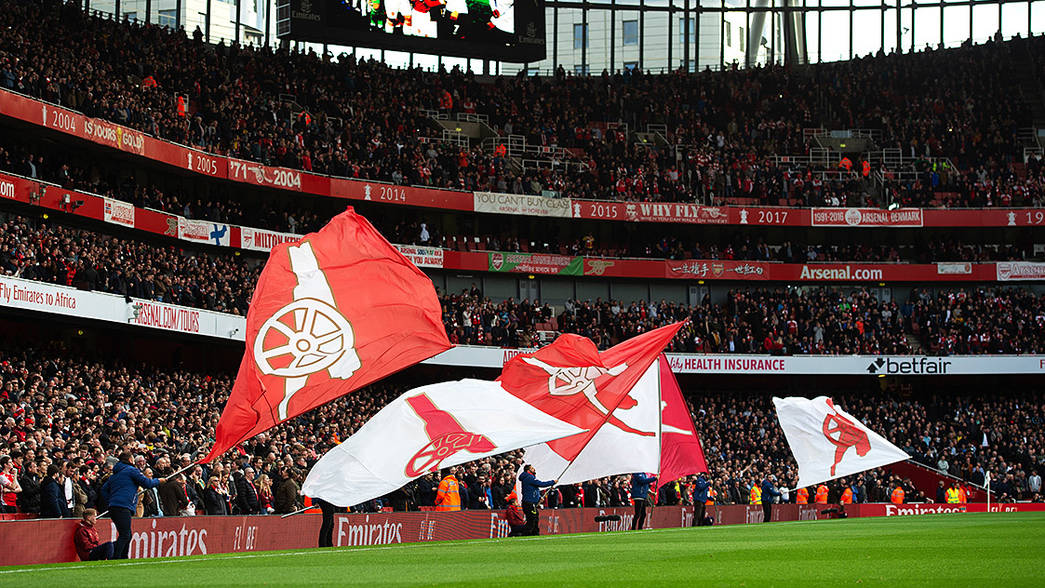